In [10]:
import sys
sys.path.append('C:/Users/Lisa Beck/Documents/01_Python_scripts/00_modules/')
from tofware_dataimport import h5_read_folder as h5f
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
import matplotlib.dates as mdates

In [11]:
# Scorpion data:
filepath = r"../../03_Data/CLOUD15/DMA_injection/"
print('LTOF data path: ',filepath)
[df,md_exactmass] = h5f(filepath)
print('Colums dataframe: ',df.columns)

LTOF data path:  ../../03_Data/CLOUD15/DMA_injection/
Colums dataframe:  Index(['NO3-', '(H2O)NO3-', 'CH3SO3-', 'HSO4-', '(H2O)2NO3-', '(CH3CH3NH)NO3-',
       '(H2O)CH3SO3-', '(H2O)HSO4-', '(H2O)3NO3-', '(HNO3)NO3-',
       ...
       '(H2O)58(HNO3)NO3-', '(H2O)55(HNO3)2NO3-', '(H2O)59(HNO3)NO3-',
       '(H2O)56(HNO3)2NO3-', '(H2O)60(HNO3)NO3-', '(H2O)57(HNO3)2NO3-',
       '(H2O)58(HNO3)2NO3-', '(H2O)59(HNO3)2NO3-', '(H2O)60(HNO3)2NO3-',
       'datetime'],
      dtype='object', length=211)


In [25]:
df['HNO3_sum'] = df['NO3-'] + df['(HNO3)NO3-'] + df['(HNO3)2NO3-']
tubeloss = 1
cal_fac = 1.72E10

df['MSA'] = ((df['CH3SO3-'] + df['(CH4SO3)NO3-'])  / df['HNO3_sum']) * tubeloss * cal_fac
df['SA'] = ((df['HSO4-'] + df['(H2SO4)NO3-'])  / df['HNO3_sum']) * tubeloss * cal_fac
dma_ncps_onlytrimer=np.log(1+((df['(CH3CH3NH)(HNO3)NO3-']+df['(CH3CH3NH)(HNO3)2NO3-'])/df['(HNO3)2NO3-']))
            
dma_ncps_all=np.log(1+(df['(CH3CH3NH)(HNO3)NO3-']+df['(CH3CH3NH)(HNO3)2NO3-'])/(df['NO3-']+df['(HNO3)NO3-']+df['(HNO3)2NO3-']))
dma_ncps_nolog=(df['(CH3CH3NH)(HNO3)NO3-']+df['(CH3CH3NH)(HNO3)2NO3-'])/(df['NO3-']+df['(HNO3)NO3-']+df['(HNO3)2NO3-'])


In [34]:
C_ppt=1.37*5.26e05
df['DMA']=C_ppt*dma_ncps_all
df['DMA_nolog']=C_ppt*dma_ncps_nolog


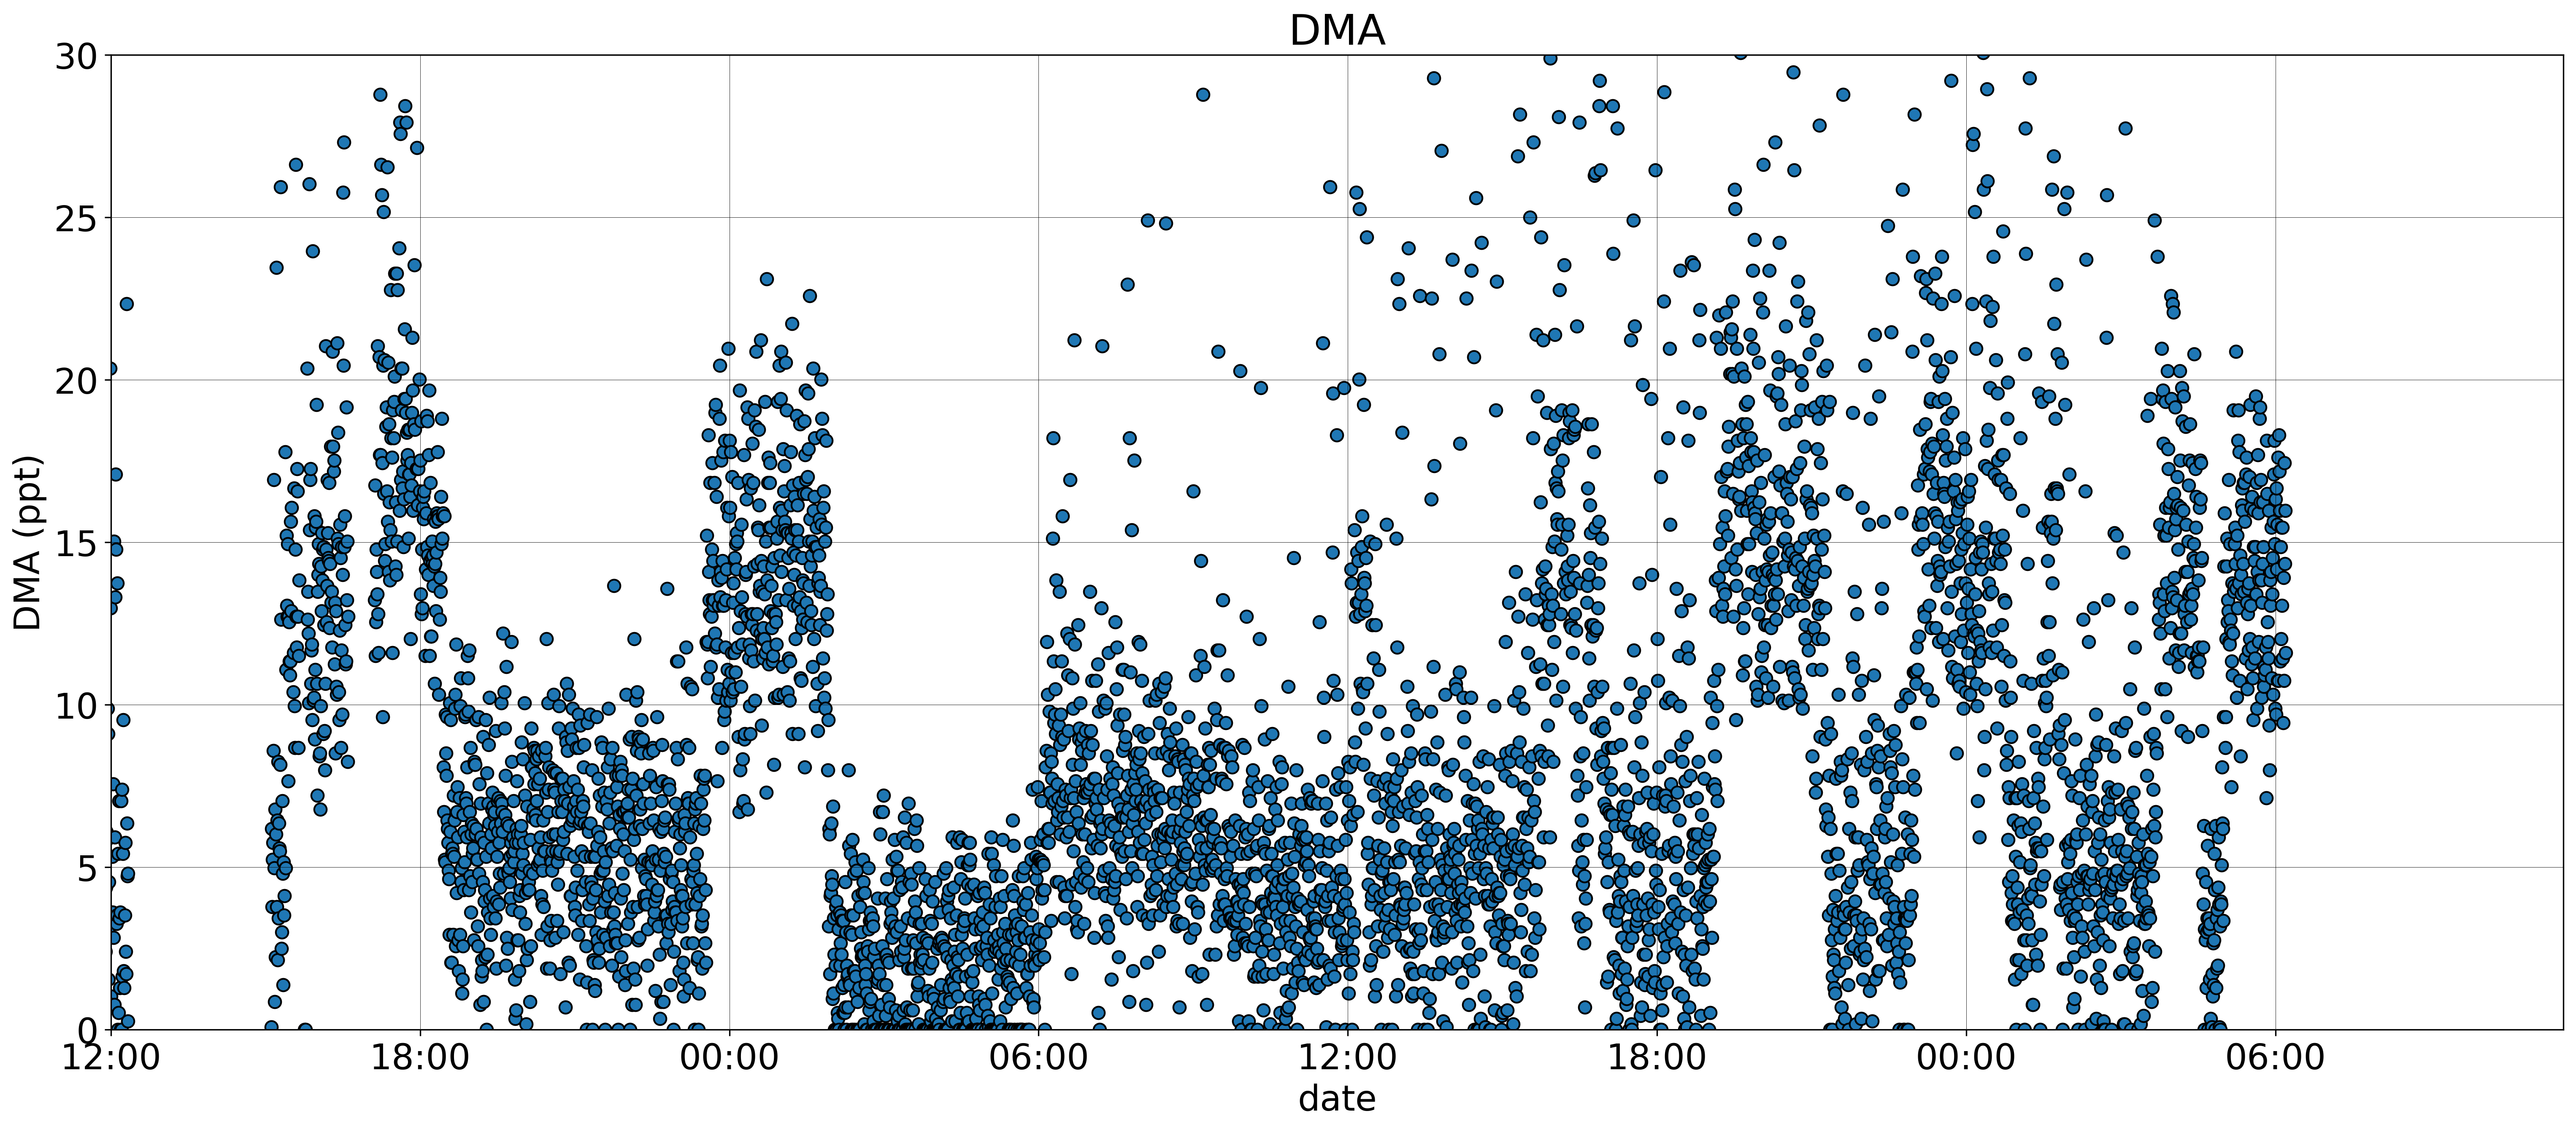

In [36]:
compound = 'DMA'
myFmt = mdates.DateFormatter('%H:%M')

xmax = datetime.today()#datetime(2022,10,5,9,0,0)#
xmin = datetime(2022,10,4,12,0,0)
ymin=0
ymax=30

fig = plt.figure(figsize=(25,10), dpi=300)
ax = fig.add_subplot(111)
ax.grid(color = 'k', linestyle = '-', linewidth = .2)
im = ax.scatter(df['datetime'],df[compound],s=50,cmap='RdYlBu',edgecolor='k')
#fig.colorbar(im, ax=ax)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
#plt.yscale('log')
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
plt.ylabel(compound + ' (ppt)',fontsize=20)
plt.xlabel('date',fontsize=20)
#ax.collections[0].colorbar.set_label('HNO3_sum',fontsize = 20)
plt.title(compound,fontsize=24)
ax.xaxis.set_major_formatter(myFmt)
plt.show()

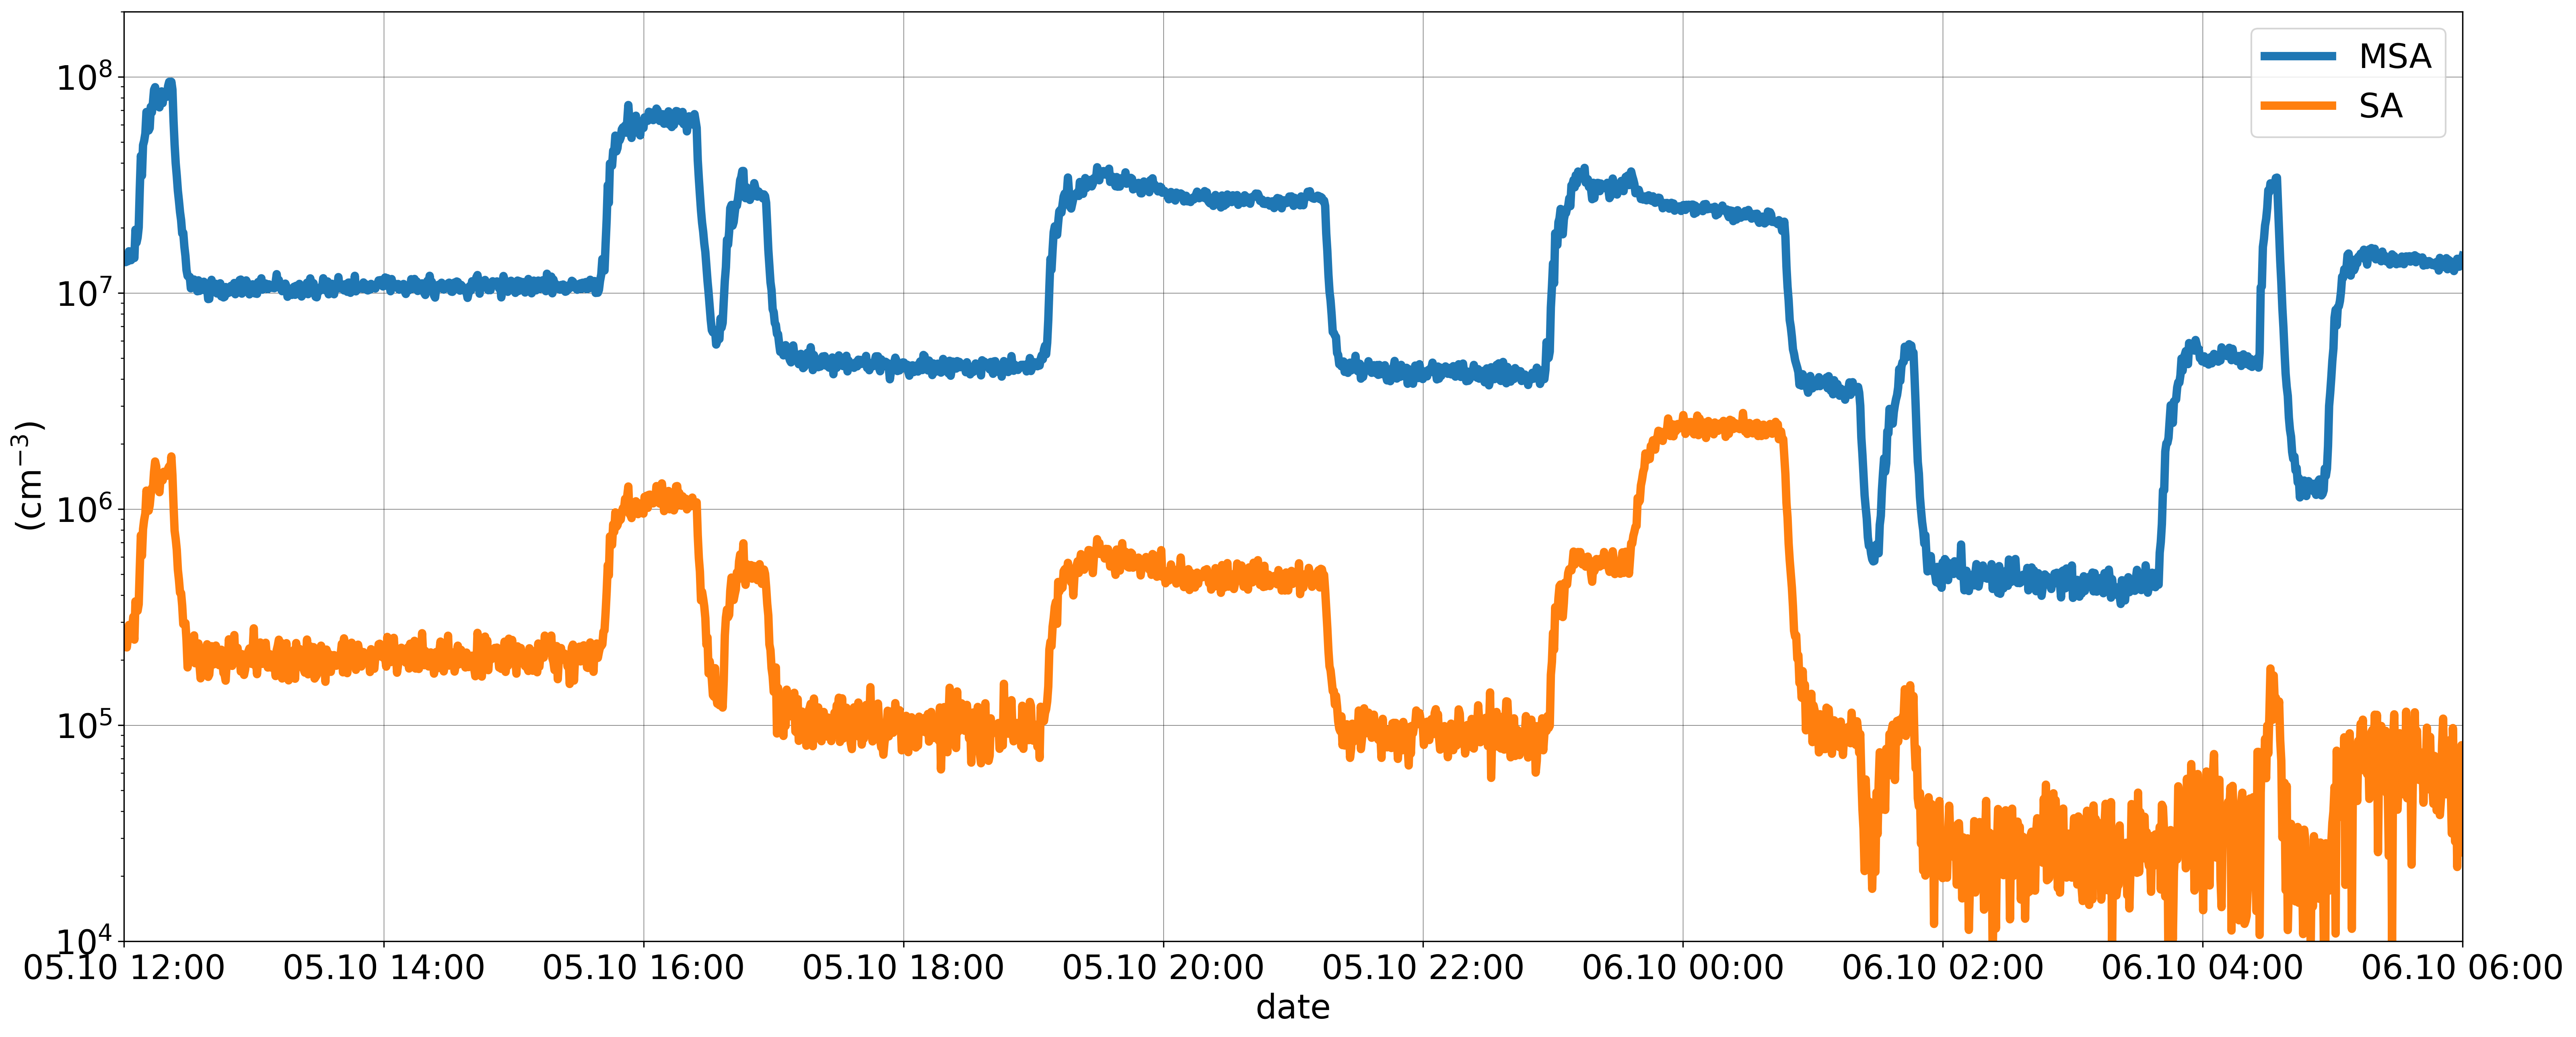

In [37]:
compound = 'MSA'
compound2 = 'SA'

myFmt = mdates.DateFormatter('%d.%m %H:%M')

xmax = datetime(2022,10,6,6,0,0)#datetime.today()#datetime(2022,10,5,9,0,0)#
xmin = datetime(2022,10,5,12,0,0)
ymin=1e4
ymax=2e8

fig = plt.figure(figsize=(25,10), dpi=300)
ax = fig.add_subplot(111)
ax.grid(color = 'k', linestyle = '-', linewidth = .2)
plt.plot(df['datetime'],df[compound],label=compound,linewidth=5)

plt.plot(df['datetime'],df[compound2],label=compound2,linewidth=5)
plt.legend(fontsize=20)
#fig.colorbar(im, ax=ax)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.yscale('log')
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
plt.ylabel('(cm$^{-3}$)',fontsize=20)
plt.xlabel('date',fontsize=20)
#ax.collections[0].colorbar.set_label('HNO3_sum',fontsize = 20)
#plt.title(compound,fontsize=24)
ax.xaxis.set_major_formatter(myFmt)
plt.show()